# Matplotlib Exercises - Part 1

[kaggle matplotlib tutorial](https://www.kaggle.com/leonlxy/matplotlib-tutorial-with-exercises-1)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
np.random.seed(0)

df = pd.DataFrame(data={'a':np.random.randint(0, 100, 30),
                        'b':np.random.randint(0, 100, 30),
                        'c':np.random.randint(0, 100, 30)})
df.head()

,a,b,c
0,44,47,17
1,47,64,79
2,64,82,4
3,67,99,42
4,67,88,58


# Commands

```python
sns.set_style
plt.figure
plt.subplot

ax.set_xlabel, ax.set_ylabel
ax.set_title
ax.legend
ax.bar

ax.set_xticks, ax.set_xticklabels, ax.set_yticks, ax.set_yticklabels
ax.tick_params

ax.set_xlim, ax.set_ylim

ax2 = ax.twinx()

ax2.text


## .plot() parameters
# lw - line width
# ls = line size
# marker
# alpha
# label
```



# Kaggle Matplotlib Tutorial

## plt.figure, plt.subplot

In [7]:
fig = plt.figure(figsize=(40, 8))

<Figure size 2880x576 with 0 Axes>

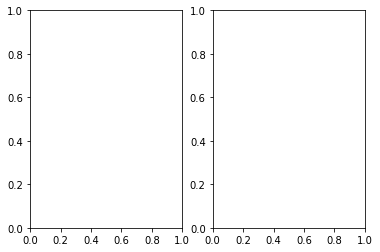

In [9]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

## plt.subplots

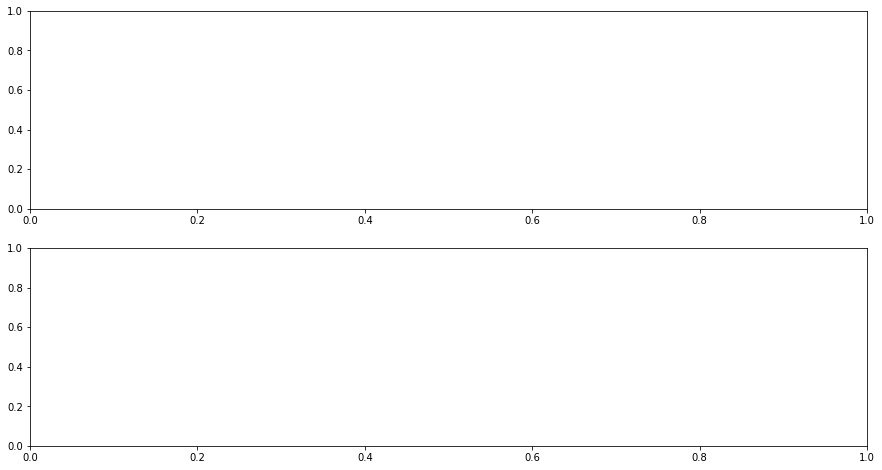

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))

In [12]:
ax[0], ax[1]

(<AxesSubplot:>, <AxesSubplot:>)


## Multiple plots

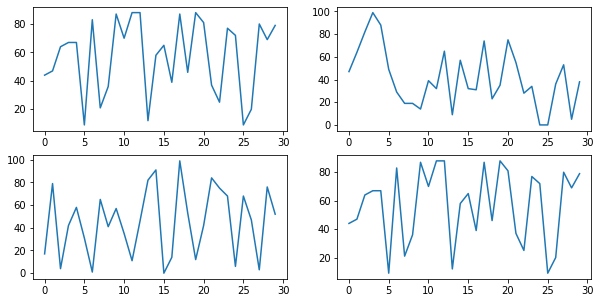

In [17]:
# Obs: note that index was used as x axis...
fig, axs = plt.subplots(2, 2, figsize=(10,5))

axs[0][0].plot(df['a'])
axs[0][1].plot(df['b'])
axs[1][0].plot(df['c'])
axs[1][1].plot(df['a'])

## line plots

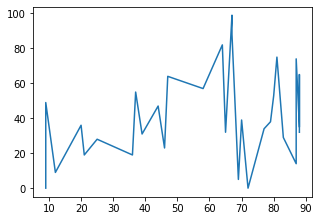

In [34]:
fig, axs = plt.subplots(1,1, figsize=(5,3.5))
df2 = df.sort_values('a')

axs.plot(df2['a'].values, df2['b'].values)

## Multiple line plots, same subplot

and some design tools

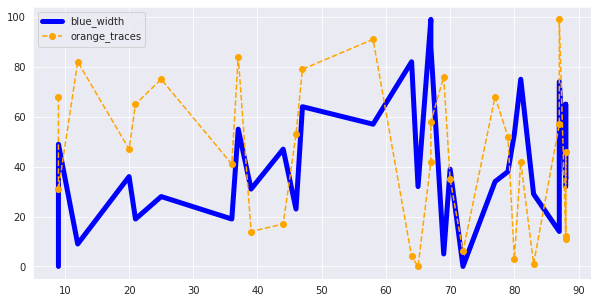

In [60]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(10, 5))

x_vals = df2['a'].values
y1 = df2['b'].values
y2 = df2['c'].values

ax.plot(x_vals, y1, color='blue', lw=5, label='blue_width')
ax.plot(x_vals, y2, color='orange', ls='--', marker='o', label='orange_traces')

ax.legend(loc='best')

# lw - line width
# ls = line size
# marker

## Ex1

Create a figure of size 15x8 with two subplots, top and bottom.

Draw two lines in the top axes, one green and one orange.

Add a legend for the top plot, Green and Orange. Put this legend in the top-middle of graph.

Extra Challenge: In the bottom axes, create a graph of only the data points, marked by circles, but with no line connecting the points.

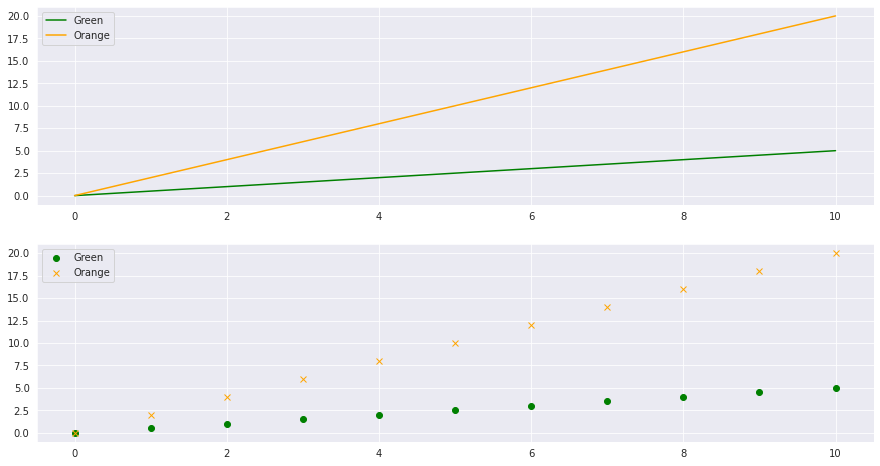

In [73]:
fig, axs = plt.subplots(2,1,figsize=(15, 8))

x = np.linspace(0, 10, 11)
y1 = np.linspace(0, 5, 11)
y2 = np.linspace(0,20,11)

axs[0].plot(x, y1, color='green', label='Green')
axs[0].plot(x, y2, color='orange', label='Orange')

axs[0].legend(loc='upper left')

axs[1].plot(x, y1, color='green', label='Green', marker='o', ls=' ')
axs[1].plot(x, y2, color='orange', label='Orange', marker='x', ls=' ')

axs[1].legend(loc='upper left')

## Barplots

<BarContainer object of 30 artists>

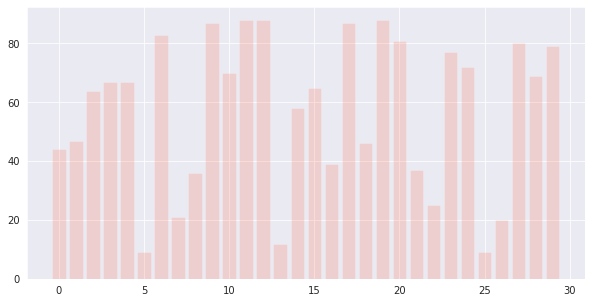

In [79]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

bar_kwargs = {'color': 'tomato', 'alpha': 0.2}
ax.bar(df.index.values, df['a'], label='a', **bar_kwargs)

## Exercise 2

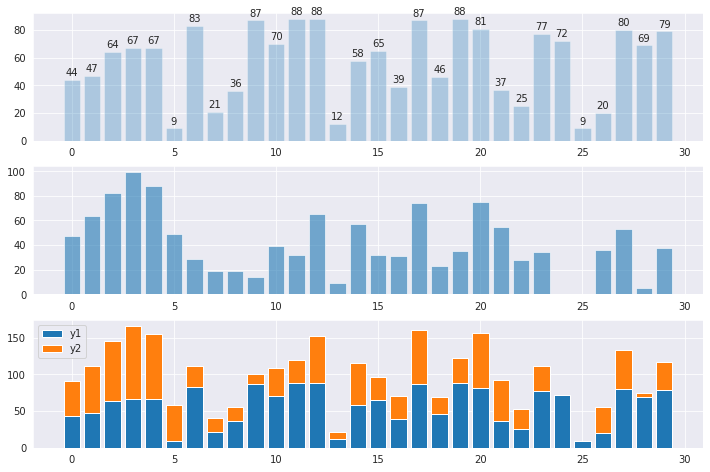

In [119]:
fig, axs = plt.subplots(3, 1, figsize=(12,8))

x = df.index.values
y1 = df['a'].values
y2 = df['b'].values

axs[0].bar(x, y1, alpha=0.3)
for i in range(len(x)):
    axs[0].text(i, df['a'][i]+3, df['a'][i], horizontalalignment='center')

axs[1].bar(x, y2, alpha=0.6)

axs[2].bar(x, y1, label='y1')
axs[2].bar(x, y2, bottom=y1, label='y2')
axs[2].legend(loc='upper left')

# Tick labels and axes labels

No handles with labels found to put in legend.


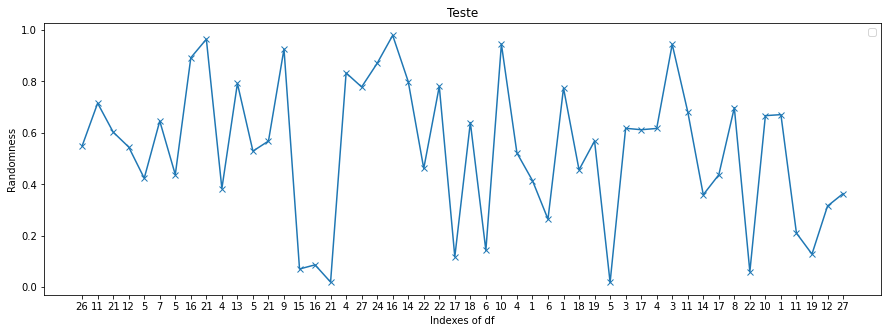

In [22]:
np.random.seed(0)

df = pd.DataFrame({'a': np.random.random(50)})

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index.values, df['a'], marker='x')
ax.set_title('Teste')
ax.set_ylabel('Randomness')
ax.set_xlabel('Indexes of df')

ax.set_xticks(df.index.values)
ax.set_xticklabels(np.random.randint(1,30, len(df)))

ax.legend()

# Exercise 3

In [23]:
# mock data
np.random.seed(0)

turnover_data = pd.DataFrame({'boardid' : ['DAY', 'DAY_X', 'DAY_U', 'TSE'], 
                              'turnover' : np.random.randint(1e6, 1e9, 4)})

# sort by turnover value
turnover_data = turnover_data.sort_values(by='turnover').reset_index().drop('index', axis=1)

# convert value to Million unit for easy-reading
turnover_data['turnover_simplified'] = turnover_data['turnover'] // 1000000

# market share
turnover_data['market_share'] = round((turnover_data['turnover'] / sum(turnover_data['turnover'])*100), 1)

turnover_data

,boardid,turnover,turnover_simplified,market_share
0,DAY,210652396,210,10.8
1,DAY_X,399764591,399,20.6
2,TSE,405868288,405,20.9
3,DAY_U,925231285,925,47.7


<ipython-input-135-144960de9692>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(turnover_data['boardid'], fontsize=13)
<ipython-input-135-144960de9692>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(x/1000000)+'M' for x in vals])
<ipython-input-135-144960de9692>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(x) + '%' for x in vals_ax2])


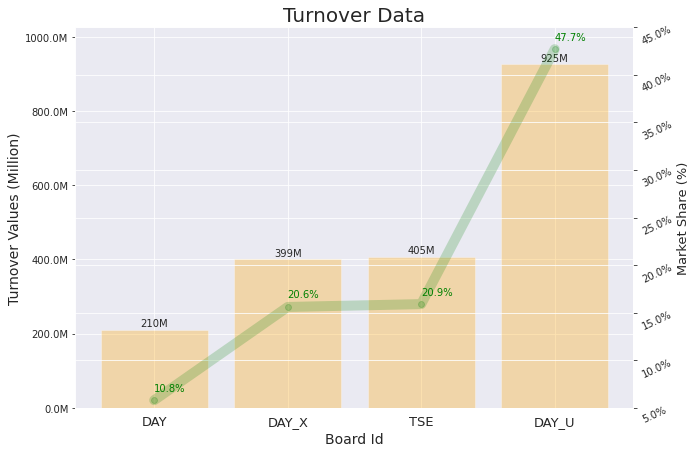

In [135]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.bar(
    x=turnover_data['boardid'],
    height=turnover_data['turnover'],
    color='orange',
    alpha=0.3
)
ax.set_xlabel('Board Id', fontsize=14)
ax.set_ylabel('Turnover Values (Million)', fontsize=14)

for i in range(turnover_data.shape[0]):
    ax.text(
        turnover_data['boardid'][i],
        turnover_data['turnover'][i] + 1e7,
        str(turnover_data['turnover_simplified'][i]) + 'M',
        fontsize=10,
        horizontalalignment='center'
    )

ax.set_title('Turnover Data', fontsize=20)
ax.set_xticklabels(turnover_data['boardid'], fontsize=13)
ax.tick_params(labelsize=10, axis='y')
ax.set_ylim(0, max(turnover_data['turnover']+1e8))


vals = ax.get_yticks()
ax.set_yticklabels([str(x/1000000)+'M' for x in vals])


###############################
ax2 = ax.twinx()

ax2.plot(turnover_data['market_share'], color='green', lw=10, alpha=0.2, marker='o')
vals_ax2 = ax2.get_yticks()
ax2.set_ylim(10, max(vals_ax2))
ax2.set_yticklabels([str(x) + '%' for x in vals_ax2])
ax2.tick_params(labelsize=10, rotation=25, axis='y')
ax2.set_ylabel('Market Share (%)', fontsize=13)

for i in range(turnover_data.shape[0]):
    ax2.text(
        i,
        turnover_data['market_share'][i]+1,
        str(turnover_data['market_share'][i]) + '%',
        color='green'
    )